In [ ]:

from dwdynamics import ComplexDynamicsProblem, Objective,helpers # Difference a. We are using ComplexDynamicsProblem
from dimod import ExactSolver
import numpy as np
import scipy
import pandas as pd
import numpy as np
import scipy as sp
import math
import pprint
import qutip as qp
import dimod


In [20]:
helpers.other_entangled_hamiltonian()

[[ 1.  1.  1. -1.]
 [ 1.  1. -1.  1.]
 [ 1. -1.  1.  1.]
 [-1.  1.  1.  1.]]


array([[ 1.,  1.,  1., -1.],
       [ 1.,  1., -1.,  1.],
       [ 1., -1.,  1.,  1.],
       [-1.,  1.,  1.,  1.]])

In [21]:
# We simulate evolution under the Hamiltonian 1/2 pi * Sigma_y...
SY = np.array([[0, -1.0j], [1.0j, 0.0]])
PSI0 = np.array([1, 0], dtype=np.complex128)  # Difference b. Initial state can now be complex.
H = 0.25*np.pi* SY
timepoints = 9
problem = ComplexDynamicsProblem(
    hamiltonian=H,      
    initial_state = PSI0,              
    times=tuple(range(timepoints)),             
    num_bits_per_var=2                 
)
qubo = problem.qubo(objective=Objective.norm) 
print(qubo.num_variables)
prop = sp.linalg.expm(1.0j * -H)
my_vect = [PSI0]
prev = PSI0
for _ in range(timepoints-1):
    prev = prop@prev
    my_vect.append(prev)
my_vect
qubo.num_variables

---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
---------
array([[ 0.70710678+0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.70710678+0.j]])
------
72


72

In [22]:
exact_solver = ExactSolver()
exact_result = exact_solver.sample(qubo)
exact_result.first.energy

ValueError: Maximum allowed dimension exceeded

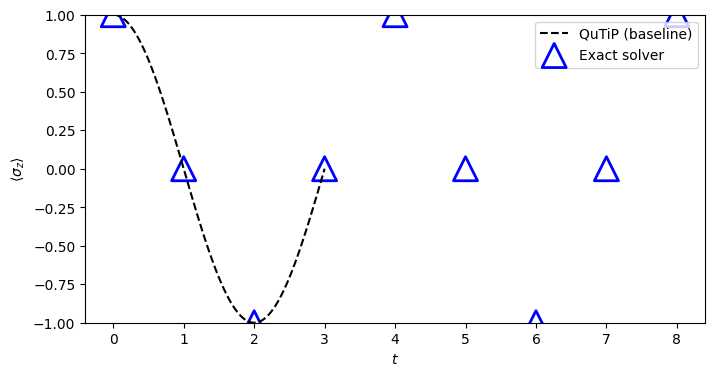

In [ ]:
# Let's compute baseline using QuTiP
import qutip as qp

psi_0 = qp.basis(2, 0)
times = np.linspace(0, 3, 100)
baseline = qp.mesolve(qp.Qobj(qp.Qobj(H)), psi_0, times, e_ops=[qp.sigmaz()]).expect[0]
# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

# decode_sample returns flat vector, we use reshape to form an 6x2 array of states
#exact_vec = problem.interpret_sample(exact_result.first.sample)

# Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
# Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
#print(exact_vec)
exact_expect = [(state.conj() @ SZ @ state).real for state in my_vect]
from matplotlib import pyplot as plt

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")

axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()
axis.set_ylim(-1,1)
plt.show()

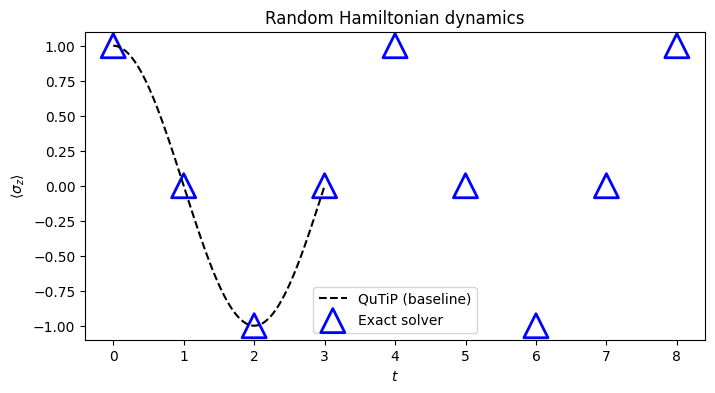

In [ ]:


from matplotlib import pyplot as plt

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")
#axis.scatter(problem.times, sa_expect, marker="o", lw=2, s=100, edgecolors="r", facecolors="none", label="SA sampler")
#axis.scatter(problem.times, dw_expect, marker="s", lw=2, s=200, edgecolors="g", facecolors="none", label="D-Wave sampler")
plt.title("Random Hamiltonian dynamics")
axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()

#

# Instances

In [ ]:
# 1. Pauli-Z
H1 = np.array([
    [1, 0],
    [0, -1]
])

# 1/math.sqrt(2)(X+Z)
H2 = 1/math.sqrt(2)*np.matrix([
    [1, 1],
    [1, -1]
])

# 3. Cyclic permutation 
H3 = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])  # !! not Hermitian !!

# iY
H4 = 1j * np.array([
    [0, -1],
    [1,  0]
])  

# 5.entangling on 2 qubits
H5 = 0.5 * np.array([
    [1, 1, 1, -1],
    [1, 1, -1, 1],
    [1, -1, 1, 1],
    [-1, 1, 1, 1]
]) 

In [ ]:
H2@H2

matrix([[ 1.00000000e+00, -2.23711432e-17],
        [-2.23711432e-17,  1.00000000e+00]])

# Try out hermitian unitary matrices

$$
  e^{iM\Theta} = I\cos\Theta+iM\sin\Theta \text{ if } M^2=I
$$
### Pauli / Significant

In [ ]:
import scipy.linalg


ox = np.array([[0, 1],[1,0]])
oz = np.array([[1,0],[0,-1]])
s_gate = np.array([[1,0],[0,1.0j]])
# rotation matrix
def rot(alpha):
    return np.array([[math.cos(alpha), -math.sin(alpha)*1.0j],[math.sin(alpha)*1.0j, math.cos(alpha)]])

hadamard = 1/math.sqrt(2) * np.array([[1,1],[1,-1]])

# entangled qubits
H = np.pi * (1/2) * np.array([
    [1, 1, 1, -1],
    [1, 1, -1, 1],
    [1, -1, 1, 1],
    [-1, 1, 1, 1]
])
pprint.pprint(H)

PSI0 = np.array([1,0,0,0], dtype=np.complex128)  
print(sp.linalg.expm(1.0j * H))

array([[ 1.57079633,  1.57079633,  1.57079633, -1.57079633],
       [ 1.57079633,  1.57079633, -1.57079633,  1.57079633],
       [ 1.57079633, -1.57079633,  1.57079633,  1.57079633],
       [-1.57079633,  1.57079633,  1.57079633,  1.57079633]])
[[-1.00000000e+00-1.11022302e-16j -1.54074396e-32-1.11022302e-16j
   2.77555756e-17+4.16333634e-17j  8.32667268e-17-1.52655666e-16j]
 [-2.77555756e-16-2.08166817e-16j -1.00000000e+00-1.80411242e-16j
   2.77555756e-17-5.55111512e-17j  8.32667268e-17+1.66533454e-16j]
 [-2.31111593e-32+8.32667268e-17j  1.11022302e-16+2.77555756e-17j
  -1.00000000e+00+1.52655666e-16j  2.77555756e-17+2.91433544e-16j]
 [-8.32667268e-17-2.08166817e-16j  2.08000434e-32+1.52655666e-16j
  -2.77555756e-17+2.49800181e-16j -1.00000000e+00+4.16333634e-16j]]


In [ ]:
PSI0= np.array([1,0],dtype=complex)
PT1 =np.pi*helpers.generate_pt_symmetric_real_eig(0.75)
print(PT1)
print("----- Eigenvalues ------")
print("----- Eigenvectors ------")
print("--------------")
print(helpers.is_ptsymmetric(PT1))
sp.linalg.expm(PT1*1.0j)

[[0.        +2.14143132j 3.92699082+0.j        ]
 [3.92699082+0.j         0.        -2.14143132j]]
----- Eigenvalues ------
----- Eigenvectors ------
--------------
True


array([[-0.89144047+0.j        ,  0.        -0.17844699j],
       [ 0.        -0.17844699j, -1.08605869+0.j        ]])

In [ ]:
PSI0_2 = np.array([1,0,0,0],dtype=np.complex128)
AB = helpers.create_entangled_hamiltonian(2)
sp.linalg.expm(AB*1.0j*2*np.pi/1*0.5)

array([[-1.+0.00000000e+00j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+1.52695104e-16j],
       [ 0.+0.00000000e+00j,  1.+0.00000000e+00j,  0.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [ 0.+0.00000000e+00j,  0.+0.00000000e+00j,  1.+0.00000000e+00j,
         0.+0.00000000e+00j],
       [ 0.+1.52695104e-16j,  0.+0.00000000e+00j,  0.+0.00000000e+00j,
        -1.+0.00000000e+00j]])

In [ ]:
H = np.pi*helpers.generate_pt_symmetric_real_eig(0.5)
print(H)
problem = ComplexDynamicsProblem(
    hamiltonian=H,      
    initial_state = PSI0,              
    times=tuple(range(2)),             
    num_bits_per_var=2 
    )               

print(PSI0)                                        
qubo = problem.qubo(objective=Objective.norm) 
G_reduced = dimod.to_networkx_graph(qubo)
print(qubo)

[[0.        +1.57079633j 3.51240737+0.j        ]
 [3.51240737+0.j         0.        -1.57079633j]]
[1.+0.j 0.+0.j]
---------
array([[-1.+0.00000000e+00j,  0.+6.57201340e-16j],
       [ 0.+7.77156117e-16j, -1.+0.00000000e+00j]])
------
BinaryQuadraticModel({0: -20.000000000000018, 1: -15.000000000000009, 8: -16.0, 9: -10.000000000000002, 2: -11.999999999999993, 3: -10.999999999999996, 10: -12.00000000000001, 11: -8.000000000000005, 4: -12.000000000000005, 5: -11.000000000000002, 12: -11.99999999999999, 13: -7.999999999999994, 6: -11.99999999999999, 7: -10.999999999999993, 14: -12.00000000000001, 15: -8.000000000000004}, {(1, 0): 20.000000000000004, (8, 0): 24.00000000000001, (8, 1): 12.000000000000005, (9, 0): 12.000000000000005, (9, 1): 6.000000000000003, (9, 8): 8.000000000000004, (3, 2): 20.000000000000004, (10, 2): 24.00000000000001, (10, 3): 12.000000000000005, (11, 2): 12.000000000000005, (11, 3): 6.000000000000003, (11, 10): 8.000000000000004, (5, 4): 20.0, (12, 4): 23.9999999999

In [ ]:
from dwave_networkx.generators.pegasus import (get_tuple_defragmentation_fn, fragmented_edges,
    pegasus_coordinates, pegasus_graph)
from dwave.system import DWaveSampler, EmbeddingComposite


# The graph fo the problem is pretty dense, we use automatic embedding to mitigate the incompatibility with actual machine
dw_sampler = EmbeddingComposite(DWaveSampler(solver={'topology__type': 'pegasus'}))


#dw_result = dw_sampler.sample(qubo, num_reads=1000, annealing_time=200)

dw_result.first.energy

np.float64(0.9968251784521964)

In [ ]:
print(qubo.num_variables)
exact_solver = ExactSolver()            
exact_result = exact_solver.sample(qubo)      
exact_result.first.energy 

16


np.float64(-5.329070518200751e-15)

# Compare with qutip

-------
np.pi*helpers.generate_pt_symmetric_real_eig(0.5)
---------
---------
array([[-1.+0.00000000e+00j,  0.+6.57201340e-16j],
       [ 0.+7.77156117e-16j, -1.+0.00000000e+00j]])
------
---------
array([[-1.+0.00000000e+00j,  0.+6.57201340e-16j],
       [ 0.+7.77156117e-16j, -1.+0.00000000e+00j]])
------
8.881784197001252e-16
[np.float64(1.0), np.float64(1.0), np.float64(1.0)]


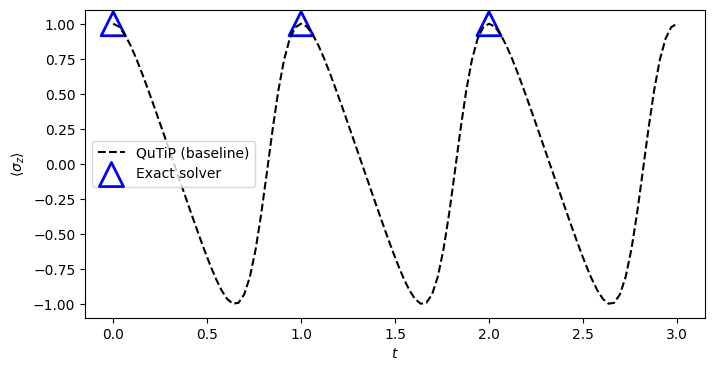

In [34]:
# Let's compute baseline using QuTiP
import qutip as qp

instance = 7
PSI0_2 = np.array([1,0,0,0],dtype=np.complex128)
instance_dict = helpers.get_instance(instance)
H = instance_dict['H']
PSI0 = instance_dict['psi0']

problem = ComplexDynamicsProblem(
    hamiltonian=H,      
    initial_state = PSI0,              
    times=tuple(range(3)),             
    num_bits_per_var=2 
    )               

qubo = problem.qubo()

exact_solver = ExactSolver()            
exact_result = exact_solver.sample(qubo)      
print(exact_result.first.energy)


times = np.linspace(0, 3, 100)
baseline = qp.mesolve(qp.Qobj(H), psi_0, times, e_ops=[qp.sigmaz()]).expect[0]
# Define sigma_z for manual computation of expected values
SZ = np.array([[1, 0], [0, -1]])

# decode_sample returns flat vector, we use reshape to form an 6x2 array of states
exact_vec = problem.interpret_sample(exact_result.first.sample)

# Difference d.: We use complex conjugation to compute expected values. For this example it shouldn't matter though.
# Then, for the expectation values we take only the real part, because otherwise matplotlib would complain.
exact_expect = [(state.conj() @ SZ @ state).real for state in exact_vec]
from matplotlib import pyplot as plt
print(exact_expect)

fig, axis = plt.subplots(figsize=(8, 4))

axis.plot(times, baseline, "k--", label="QuTiP (baseline)")

axis.scatter(problem.times, exact_expect, marker="^", lw=2, s=300, edgecolors="b", facecolors="none", label="Exact solver")

axis.set_ylabel(r"$\langle \sigma_z \rangle$")
axis.set_xlabel("$t$")
axis.legend()
plt.show()